<a href="https://colab.research.google.com/github/05satyam/fake-news-detection/blob/main/264_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, f1_score,  classification_report
from sklearn.model_selection import KFold

>Loading data set from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataSet = pd.read_csv("drive/My Drive/264/train.csv")

In [ ]:
dataSet.head(20)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [ ]:
dataSet.shape

(10240, 2)

>Creating distribution graph for reference

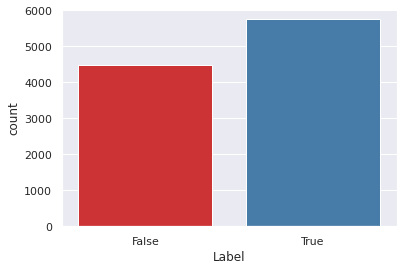

In [ ]:
def createDistributionGraph(dataFile):
    sb.set_theme(style="darkgrid")
    return sb.countplot(x='Label', data=dataFile, palette='Set1')

createDistributionGraph(dataSet)

>Performing quality check on data set to remove any empty, null data row

In [ ]:
def qualityCheckOfData():
    print("Checking data qualitites...")
    dataSet.isnull().sum()
    dataSet.info()  
    print("check finished.")
qualityCheckOfData()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
check finished.


In [ ]:
dataSet = dataSet.dropna()

In [ ]:
qualityCheckOfData()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 170.0+ KB
check finished.


In [ ]:
dataSet.shape

(10240, 2)

In [ ]:
dataSet.head(10)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [ ]:
dataSet.reset_index(drop= True,inplace=True)

In [ ]:
dataSet.head(10)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [ ]:
dataSet['Statement'][2188]

'Says 94 percent of Wisconsin employers think the state is heading in the right direction and a majority say they will grow their companies in 2012.'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [ ]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
for x in range(len(dataSet)) :
    corpus = []
    review = dataSet['Statement'][x]
    reviewLable = dataSet['Label'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    #reviewLable = reviewLable.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    dataSet['Statement'][x] = review
    dataSet['Label'][x] = reviewLable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataSet.head(5)

,Statement,Label
0,say annies list political group support thirdt...,False
1,decline coal start started natural gas took st...,True
2,hillary clinton agrees john mccain voting give...,True
3,health care reform legislation likely mandate ...,False
4,economic turnaround started end term,True


>Splitting processed data set into **X_train, X_test, Y_train, Y_test**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataSet['Statement'], dataSet['Label'], test_size=0.3, random_state=1)

In [ ]:
X_train.head(2)

3474    saysbarack obama voted language ofindianas rel...
6202                  say apple tim cook business indiana
Name: Statement, dtype: object

In [ ]:
X_test.head(2)

7288       say president barack obama think american lazy
3597    house delegate seat go uncontested every year ...
Name: Statement, dtype: object

>Loading TfidfVectorizer object and transforming the training data set into **tfidfVector_X_train and tfidfVec_X_test**

In [ ]:
tfidfVector = TfidfVectorizer()
tfidfVec_X_train = tfidfVector.fit_transform(X_train)
tfidfVec_X_test = tfidfVector.transform(X_test)

In [ ]:
tfidfVec_X_train.shape


(7168, 9112)

>In below section we have defined code for plotting the **confusion matrix** for each classifer. Along with this we have code for **plotGraph** where we are plotting a comparison graph between **Training Score** and **Cross-Validation Score**.

>A ***confusion matrix*** is a metric tool for evaluating the results of a classification machine learning model. It helps us to visualize important predictive analytics like recall, specificity, accuracy, and precision

In [ ]:
def plotConfusionMatrixGraph(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def getConfusionMatrix(Y_pred):
    scores = []
    confusion = np.array([[0,0],[0,0]])
    #Y_pred = classifier1.predict(tfidfVec_X_test)
    score = metrics.accuracy_score(Y_test, Y_pred)
    print(f'Accuracy: {round(score*100,3)}%')
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    plotConfusionMatrixGraph(cm, classes=['FAKE Data', 'REAL Data'])
    confusion += confusion_matrix(Y_test,Y_pred)
    score = f1_score(Y_test,Y_pred)
    scores.append(score)  
    print('Score:', sum(scores)/len(scores))

    print('Confusion matrix:')
    print(confusion)

In [ ]:
def plotGraph(train_sizes, train_scores, test_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
   # plt.figure()
    plt.title("Classifier")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
        
    # box-like grid
    plt.grid()

   
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean,'o-' , color="g", label="Cross-validation score")

        
        # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

        # sizes the window for readability and displays the plot
        # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()


In [ ]:
dataSet.head(5)
#label_train.head(5)

,Statement,Label
0,say annies list political group support thirdt...,False
1,decline coal start started natural gas took st...,True
2,hillary clinton agrees john mccain voting give...,True
3,health care reform legislation likely mandate ...,False
4,economic turnaround started end term,True


>Below section is dedicated for our first clasifier i.e.***PassiveAggressiveClassifier***. 
>It belongs to the machine learning category of online learning algorithms. It operates by responding passively to accurate classifications and aggressively to any misclassifications. 
Here we are using **tfidfVec_X_test** and then plotting confusion matrix and graph between training and cross validation score.

Accuracy: 55.632%
Confusion matrix, without normalization
Score: 0.6043541364296082
Confusion matrix:
[[ 668  663]
 [ 700 1041]]


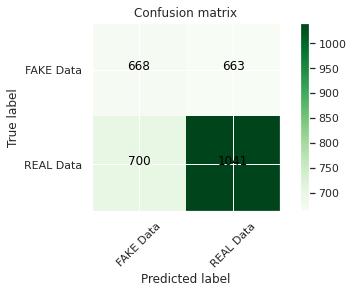

In [ ]:
classifier1 = PassiveAggressiveClassifier()
classifier1.fit(tfidfVec_X_train,Y_train)
Y_pred = classifier1.predict(tfidfVec_X_test)
getConfusionMatrix(Y_pred)


>Below section is dedicated to our second classifier ***DecisionTreeClassifier***. 

>A **decision tree** is a **supervised learning technique** that can solve both regression and classification issues. Its capability to use several feature subsets and decision criteria at various stages of categorization

Learning curve for PassiveAggressiveClassifier


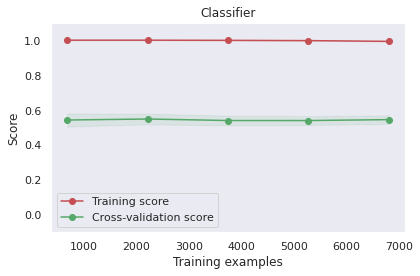

In [ ]:
size = 20
cv = KFold(size, shuffle=True)

train_sizes, train_scores, test_scores = learning_curve(classifier1, tfidfVec_X_train, Y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
print('Learning curve for PassiveAggressiveClassifier')
plotGraph(train_sizes, train_scores, test_scores)

Accuracy: 56.217%
Confusion matrix, without normalization
Score: 0.6140602582496414
Confusion matrix:
[[ 657  674]
 [ 671 1070]]


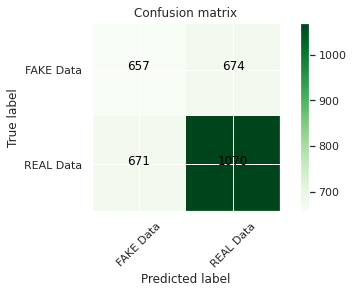

In [ ]:
classifier2 = DecisionTreeClassifier()
classifier2.fit(tfidfVec_X_train,Y_train)
Y_pred = classifier2.predict(tfidfVec_X_test)
getConfusionMatrix(Y_pred)

Learning curve for DecisionTreeClassifier


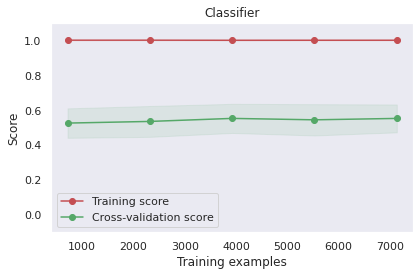

In [ ]:
size = 200
cv = KFold(size, shuffle=True)
train_sizes, train_scores, test_scores = learning_curve(classifier2, tfidfVec_X_train, Y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
print('Learning curve for DecisionTreeClassifier')
plotGraph(train_sizes, train_scores, test_scores)

>Below section is dedicated to our 3rd classifier ***RandomForestClassifier***

>A **random forest** is a meta estimator that employs averaging to increase predicted accuracy and control over-fitting by fitting a number of decision tree classifiers on various sub-samples of the dataset. It improves accuracy by using cross validation.

Accuracy: 56.836%
Confusion matrix, without normalization
Score: 0.7238650562265722
Confusion matrix:
[[   8 1323]
 [   3 1738]]


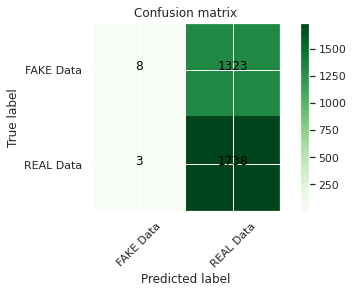

In [ ]:
classifier3 = RandomForestClassifier(max_depth=10, random_state=0)
classifier3.fit(tfidfVec_X_train,Y_train)
Y_pred = classifier3.predict(tfidfVec_X_test)
getConfusionMatrix(Y_pred)

Learning curve for RandomForestClassifier


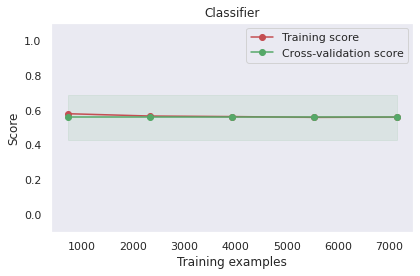

In [ ]:
size = 500
cv = KFold(size, shuffle=True)
train_sizes, train_scores, test_scores = learning_curve(classifier3, tfidfVec_X_train, Y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
print('Learning curve for RandomForestClassifier')
plotGraph(train_sizes, train_scores, test_scores)

>Below section is dedicated to our 4th classifier SVC.

>SVC, NuSVC, and LinearSVC are three classes in **Scikit-learn** that can do multiclass-class classification.

>**SVC** is a **C-based support vector classification system** based on libsvm. sklearn.svm.SVC is the module used by scikit-learn. This class is responsible for multiclass support using a one-to-one mechanism.

Accuracy: 60.872%
Confusion matrix, without normalization
Score: 0.6903657908294694
Confusion matrix:
[[ 530  801]
 [ 401 1340]]


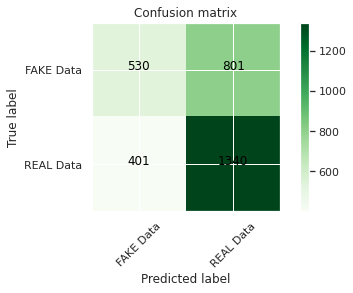

In [ ]:
classifier4 = svm.SVC()
classifier4.fit(tfidfVec_X_train,Y_train)
Y_pred = classifier4.predict(tfidfVec_X_test)
getConfusionMatrix(Y_pred)

Learning curve for SVC


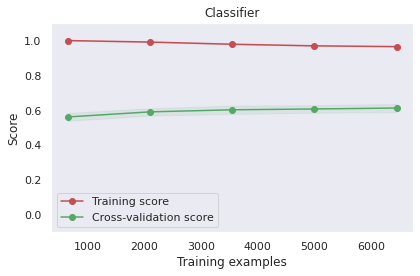

In [ ]:
size = 10
cv = KFold(size, shuffle=True)
train_sizes, train_scores, test_scores = learning_curve(classifier4, tfidfVec_X_train, Y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
print('Learning curve for SVC')
plotGraph(train_sizes, train_scores, test_scores)

>Below section is dedicated to our 5th classifier **SGDClassifier** 

>It's a linear classifier that employs SGD for training (it's a linear SVM by default in sklearn that is, looking for the minima of the loss using SGD). 
It is used to determine the values of parameters/function coefficients that minimize a cost function.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Accuracy: 58.691%
Confusion matrix, without normalization
Score: 0.6491567597456456
Confusion matrix:
[[ 629  702]
 [ 567 1174]]


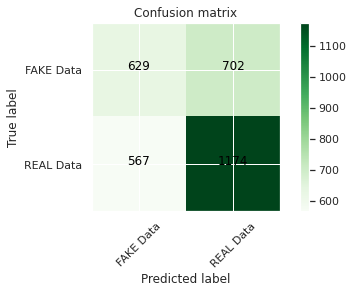

In [ ]:
classifier5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=20)
classifier5.fit(tfidfVec_X_train,Y_train)
Y_pred = classifier5.predict(tfidfVec_X_test)
getConfusionMatrix(Y_pred)

Learning curve for SGDClassifier


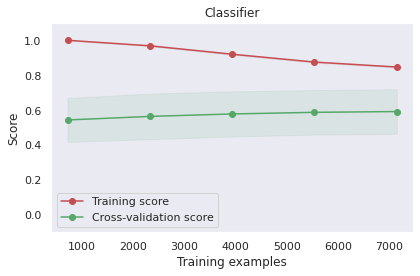

In [ ]:
size = 500
cv = KFold(size, shuffle=True)
train_sizes, train_scores, test_scores = learning_curve(classifier5, tfidfVec_X_train, Y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
print('Learning curve for SGDClassifier')
plotGraph(train_sizes, train_scores, test_scores)

>In next section we will predict the user input after loading the 5 models separately. Here each classifier has been loaded and and stored to perform the operartions

In [ ]:
#classfier 1: PassiveAggressiveClassifier
pickle.dump(classifier1,open('./model1.pkl', 'wb'))
loaded_model1 = pickle.load(open('./model1.pkl', 'rb'))

In [ ]:
#classifier 2: DecisionTreeClassifier
pickle.dump(classifier2,open('./model2.pkl', 'wb'))
loaded_model2 = pickle.load(open('./model2.pkl', 'rb'))

In [ ]:
#classifier 3: RandomForestClassifier
pickle.dump(classifier3,open('./model3.pkl', 'wb'))
loaded_model3 = pickle.load(open('./model3.pkl', 'rb'))

In [ ]:
#classfier 4: SVC
pickle.dump(classifier4,open('./model4.pkl', 'wb'))
loaded_model4 = pickle.load(open('./model4.pkl', 'rb'))

In [ ]:
#classfier 5: SGDClassifier
pickle.dump(classifier5,open('./model5.pkl', 'wb'))
loaded_model5 = pickle.load(open('./model5.pkl', 'rb'))

> Below is the main method for fake news detect which is accepting a parameter string "news" and using all the classifier models to make prediction. The input news is processed by changing all characters to lower case, then using nltk word_tokenizer to tokenize the input news and further doing processing by loading stopwords.  Then the processed input news is transformed using tfidf vectorizer to fit the news into the classifers defined above.




In [ ]:
def fakeNewsDetect(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidfVector.transform(input_data)
    prediction1 = loaded_model1.predict(vectorized_input_data)
    prediction2 = loaded_model2.predict(vectorized_input_data)
    prediction3 = loaded_model3.predict(vectorized_input_data)
    prediction4 = loaded_model4.predict(vectorized_input_data)
    prediction5 = loaded_model5.predict(vectorized_input_data)
    if prediction1[0] == 0:
        print("Prediction of the News from PassiveAggressiveClassifier :  Looking Fake⚠ News ")
    else:
        print("Prediction of the News from PassiveAggressiveClassifier : Looking Real News ")
        
    if prediction2[0] == 0:
        print("Prediction of the News from DecisionTreeClassifier :  Looking Fake⚠ News ")
    else:
        print("Prediction of the News from DecisionTreeClassifier : Looking Real News ")
    
    if prediction3[0] == 0:
        print("Prediction of the News from RandomForestClassifier :  Looking Fake⚠ News ")
    else:
        print("Prediction of the News from RandomForestClassifier : Looking Real News ")
    
    if prediction4[0] == 0:
        print("Prediction of the News from SVC :  Looking Fake⚠ News ")
    else:
        print("Prediction of the News from SVC : Looking Real News ")
    
    if prediction5[0] == 0:
        print("Prediction of the News from SGDClassifier :  Looking Fake⚠ News ")
    else:
        print("Prediction of the News from SGDClassifier : Looking Real News ")

>**Taking user input to predict whether the news is real or fake.**

In [ ]:
var = input("Please enter the news : ")
print("You entered: " + str(var))

Please enter the news : test me
You entered: test me


>**Calling main method to detect user input**

In [ ]:
fakeNewsDetect(var)

Prediction of the News from PassiveAggressiveClassifier :  Looking Fake⚠ News 
Prediction of the News from DecisionTreeClassifier :  Looking Fake⚠ News 
Prediction of the News from RandomForestClassifier : Looking Real News 
Prediction of the News from SVC :  Looking Fake⚠ News 
Prediction of the News from SGDClassifier :  Looking Fake⚠ News 
